In [ ]:
import pandas as pd
import numpy as np


In [ ]:
data = pd.read_csv("/content/new_york_listings_2024.csv")
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,2015-12-20,0.03,1,0,0,No License,5.0,1,1,Not specified
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,2023-05-01,0.24,139,364,2,No License,4.67,2,1,1
2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,2023-12-18,1.67,1,343,6,Exempt,4.17,1,2,1
3,3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,2023-09-17,1.38,2,363,12,No License,4.64,1,1,1
4,40896611,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,2023-12-03,0.24,133,335,3,No License,4.91,Studio,1,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   name                            20758 non-null  object 
 2   host_id                         20758 non-null  int64  
 3   host_name                       20758 non-null  object 
 4   neighbourhood_group             20758 non-null  object 
 5   neighbourhood                   20758 non-null  object 
 6   latitude                        20758 non-null  float64
 7   longitude                       20758 non-null  float64
 8   room_type                       20758 non-null  object 
 9   price                           20758 non-null  float64
 10  minimum_nights                  20758 non-null  int64  
 11  number_of_reviews               20758 non-null  int64  
 12  last_review                     

In [ ]:
data.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


There is no null values or mising values in any columsn in the dataset.

### What is the minimum and maximum price of the properties?

In [ ]:
data['price'].min()

10.0

In [ ]:
data['price'].max()

100000.0

### gg

In [ ]:
import folium
from IPython.display import HTML

In [ ]:
map1 = folium.Map(location=[40.8, -73.8], zoom_start=10)
FastMarkerCluster(data=[(lat, lon) for lat, lon in zip(data['latitude'], data['longitude'])]).add_to(map1)
map1

In [ ]:
data['neighbourhood_group'].value_counts()

,count
neighbourhood_group,
Manhattan,8038
Brooklyn,7719
Queens,3761
Bronx,949
Staten Island,291


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


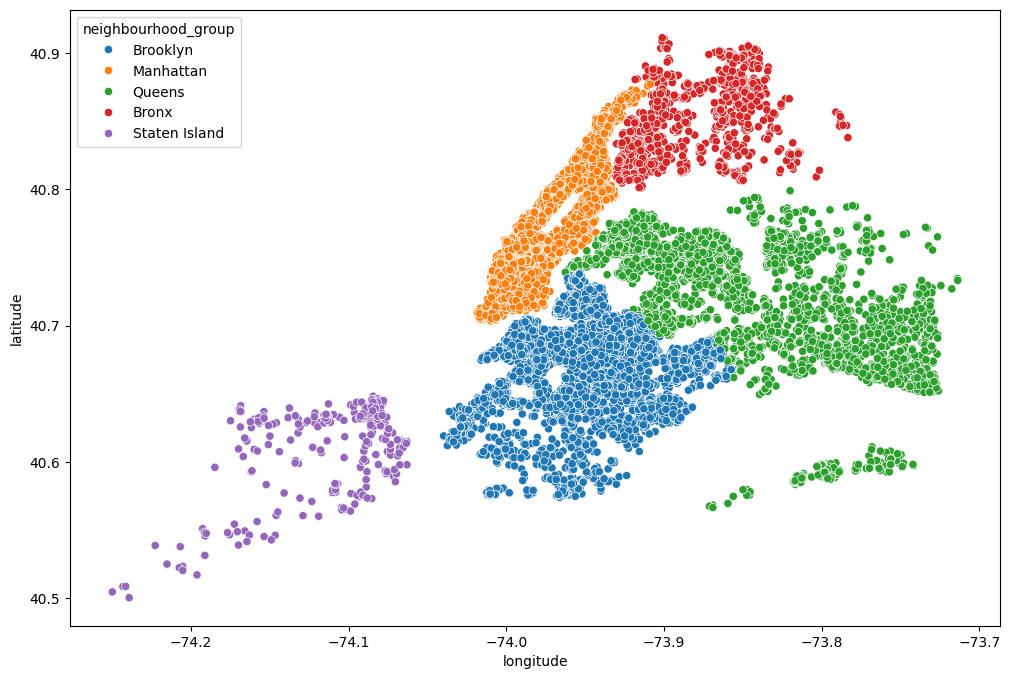

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=data.longitude, y=data.latitude, hue=data.neighbourhood_group)
plt.show()

In [ ]:
data[['neighbourhood','neighbourhood_group']]

,neighbourhood,neighbourhood_group
0,Clinton Hill,Brooklyn
1,Hell's Kitchen,Manhattan
2,Chelsea,Manhattan
3,Washington Heights,Manhattan
4,Murray Hill,Manhattan
...,...,...
20753,Lower East Side,Manhattan
20754,Greenwich Village,Manhattan
20755,Hell's Kitchen,Manhattan
20756,Chinatown,Manhattan


### How many different neighbourhoods are there in each neighbourhood group?

In [ ]:
data.groupby('neighbourhood_group')['neighbourhood'].nunique()

,neighbourhood
neighbourhood_group,
Bronx,48
Brooklyn,48
Manhattan,32
Queens,51
Staten Island,42


In [ ]:
data[['id', 'neighbourhood_group']].groupby('neighbourhood_group').count()

,id
neighbourhood_group,
Bronx,949
Brooklyn,7719
Manhattan,8038
Queens,3761
Staten Island,291
